# Import libs

In [106]:
# Import some stuff
import os
from dotenv import load_dotenv
from pathlib import Path
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import ast
import datetime
import seaborn as sns
import json
import numpy as np

import matplotlib as mpl

from datetime import datetime
from dateutil.parser import parse
import pandas as pd


from pandas.io.json import json_normalize
from PIL import Image
from wordcloud import STOPWORDS, WordCloud

# SET A SEED
seed = 320


# We will need this at some point....
import geopandas as gp

In [107]:

import folium
from folium.plugins import HeatMap
import matplotlib as mpl

In [108]:
# specifies number of rows to show
pd.set_option('display.max_rows', 300) 

# specifies default number format to 4 decimal places
pd.options.display.float_format = '{:40,.4f}'.format 

# specifies that graphs should use ggplot styling
plt.style.use('ggplot') 

%matplotlib inline

In [109]:
# load .env variable
base_dir = 'D:\Documentos\GitHub\CityBlender'
dotenv_file = os.path.join(base_dir, '.env')


if os.path.isfile(dotenv_file):
    load_dotenv(dotenv_file, verbose=True)
    
db_uri = os.getenv('DB_URI')

In [110]:
# create a new MongoDB Client
db_client = MongoClient(str(db_uri))

# If it's ok it should return a 1.0
db_client.london.command("serverStatus")['ok']

1.0

In [111]:
# choose a database to connect to (.london)
db_london = db_client.london

# choose a collection
db_london_events = db_london['events']
db_london_artist = db_london['artists']

In [112]:
# lookup all the documents in a collection
db_london_events.find()

## EOD

In [113]:
events = pd.DataFrame(list(db_london_events.find({})))

In [114]:
events.columns

Index(['_id', 'artists', 'date', 'datetime', 'datetime_source', 'foursquare',
       'id', 'lastfm', 'location', 'name', 'popularity', 'spotify', 'time',
       'type', 'url', 'venue'],
      dtype='object')

### For instance in the first row there are 3 events

In [115]:
# Put this in the date fomrat
events['date'] = [(datetime.strptime(events['date'][x], '%Y-%m-%d')) for x in range(len(events['date']))]

# Convert the dates into day name
events['date_name'] = [(events['date'][x].strftime("%A")) for x in range(len(events['date']))]

# Lat & Long
events['lat'] = [(events['location'][x]['lat']) for x in range(len(events['location']))]
events['lng'] = [(events['location'][x]['lng']) for x in range(len(events['location']))]

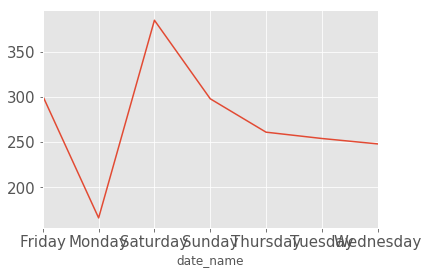

In [116]:
events.groupby('date_name').count()['_id'].plot()

## Spotify

In [117]:
type(events['spotify'][0])

dict

In [118]:
len(events['spotify'][0])

66

In [119]:
for key in events['spotify'][0]:
  print(key)

genres
popularity
popularity_median
popularity_min
popularity_max
popularity_pvariance
followers
followers_sum
danceability
danceability_median
danceability_min
danceability_max
danceability_pvariance
energy
energy_median
energy_min
energy_max
enery_pvariance
key
key_mode
key_min
key_max
loudness
loudness_median
loudness_min
loudness_max
loudness_pvariance
mode
mode_mode
speechiness
speechiness_median
speechines_min
speechines_max
speechines_pvariance
acousticness
acousticness_median
acousticness_min
acousticness_max
acousticness_pvariance
instrumentalness
instrumentalness_median
instrumentalness_min
instrumentalness_max
instrumentalness_pvariance
liveness
liveness_median
liveness_min
liveness_max
liveness_pvariance
valence
valence_median
valence_min
valence_max
valence_pvariance
tempo
tempo_median
tempo_min
tempo_max
tempo_pvariance
duration_ms
duration_ms_mean
duration_ms_min
duration_ms_max
duration_ms_pvariance
time_signature
time_signature_mode


In [120]:
list1 = [
    'popularity_pvariance',
    'danceability_pvariance',
    'enery_pvariance',
    'speechines_pvariance',
    'acousticness_pvariance',
    'instrumentalness_pvariance',
    'liveness_pvariance',
    'valence_pvariance',
    'duration_ms_pvariance',
    'tempo_pvariance',]

In [121]:
list_of_bars = [
    'popularity_median',
    'followers_sum',
    'danceability_median',
    'energy_median',
    'key_mode',
    'loudness_median',
    'mode_mode',
    'speechiness_median',
    'acousticness_median',
    'instrumentalness_median',
    'liveness_median',
    'valence_median',
    'duration_ms_mean',
    'time_signature_mode']

In [122]:
def make_vars(db = events, dictionary = 'spotify', var = 'popularity_median'):
    lista_nueva = []
    # Make this for the desired variable
    for i in range(len(db[dictionary])):
        # If there is nothing in the spotify dictionary, make Nan value
        if type(db[dictionary][i]) == float:
            lista_nueva.append(np.nan)

        else:
            # print(db[dictionary][i][var])
            lista_nueva.append(db[dictionary][i][var])
            
    # Integrate all the stuff
    db[var] =   lista_nueva      


In [123]:
for i in list_of_bars:
    # print(i)
    make_vars(db = events, dictionary = 'spotify', var = i)

In [124]:
def make_boxes( db = events, var_x = "date_name", var_y = 'popularity_median'):
    plt.rcParams['figure.figsize'] = 12, 8
    axis_font = {'fontname':'Arial', 'size':'25'}

    plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=15)    # fontsize of the tick labels


    sns.boxplot(x=var_x, y = var_y, data=db)

    plt.xlabel(var_x, **axis_font)
    plt.ylabel(var_y, **axis_font)
    

# Plotly Stuff

In [125]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

plotly.tools.set_credentials_file(username='cohenjota', api_key='I6zLnEN42oNTpZv36icg')

In [126]:
events.groupby('date_name').count()['_id']

date_name
Friday       301
Monday       166
Saturday     385
Sunday       298
Thursday     261
Tuesday      254
Wednesday    248
Name: _id, dtype: int64

In [127]:
dates = pd.DataFrame(events['date'].unique())
dates['d_name'] = events['date'].unique()
dates = dates.drop(0, 1)

In [128]:
dates.columns

Index(['d_name'], dtype='object')

In [129]:
dates['day'] = [(dates['d_name'][x].strftime("%A")) for x in range(len(dates['d_name']))]


In [130]:
db1 = dates.groupby('day').count()

In [131]:
db1['events_q'] =events.groupby('date_name').count()['_id']

In [132]:
db1['names'] = db1.index

In [133]:
db1['AVG'] = db1['events_q']/db1['d_name']

In [134]:
db1

d_name  events_q      names  \
day                                      
Friday          3       301     Friday   
Monday          5       166     Monday   
Saturday        4       385   Saturday   
Sunday          5       298     Sunday   
Thursday        4       261   Thursday   
Tuesday         5       254    Tuesday   
Wednesday       4       248  Wednesday   

                                               AVG  
day                                                 
Friday                                    100.3333  
Monday                                     33.2000  
Saturday                                   96.2500  
Sunday                                     59.6000  
Thursday                                   65.2500  
Tuesday                                    50.8000  
Wednesday                                  62.0000

In [135]:
trace1 = go.Bar(
    x=db1['names'][1],
    y=db1['AVG'][1],
    name=db1['names'][1],
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x=db1['names'][5],
    y=db1['AVG'][5],
    name=db1['names'][5],
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Bar(
    x=db1['names'][6],
    y=db1['AVG'][6],
    name=db1['names'][6],
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2,
        )
    )
)

trace4 = go.Bar(
    x=db1['names'][4],
    y=db1['AVG'][4],
    name=db1['names'][4],
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2,
        )
    )
)

trace5 = go.Bar(
    x=db1['names'][0],
    y=db1['AVG'][0],
    name=db1['names'][0],
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2,
        )
    )
)

trace6 = go.Bar(
    x=db1['names'][2],
    y=db1['AVG'][2],
    name=db1['names'][2],
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2,
        )
    )
)

trace7 = go.Bar(
    x=db1['names'][3],
    y=db1['AVG'][3],
    name=db1['names'][3],
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2,
        )
    )
)

data = [trace1,
        trace2,
        trace3,
        trace4,
        trace5,
        trace6,
        trace7,
       ]

layout = go.Layout(
    title='Amount of Gigs per day of week', 
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='gigy-bar')

# Box plots

In [136]:
def make_boxes( db = events, var_x = "date_name", var_y = 'popularity_median'):
    plt.rcParams['figure.figsize'] = 12, 8
    axis_font = {'fontname':'Arial', 'size':'25'}

    plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=15)    # fontsize of the tick labels


    sns.boxplot(x=var_x, y = var_y, data=db)

    plt.xlabel(var_x, **axis_font)
    plt.ylabel(var_y, **axis_font)
    

In [137]:
def plotly_box(var='popularity_median', tit ='Popularity of Gigs, by day'):
    trace0 = go.Box(
        y=events[events['date_name'] == db1['names'][1]][var], name=db1['names'][1])

    trace1 = go.Box(
        y=events[events['date_name'] == db1['names'][5]][var], name=db1['names'][5])

    trace2 = go.Box(
        y=events[events['date_name'] == db1['names'][6]][var], name=db1['names'][6])

    trace3 = go.Box(
        y=events[events['date_name'] == db1['names'][4]][var], name=db1['names'][4])

    trace4 = go.Box(
        y=events[events['date_name'] == db1['names'][2]][var], name=db1['names'][2])

    trace5 = go.Box(
        y=events[events['date_name'] == db1['names'][0]][var], name=db1['names'][0])
    
    trace6 = go.Box(
        y=events[events['date_name'] == db1['names'][3]][var], name=db1['names'][3])
                                                                                   
    layout = go.Layout(
        title=tit,
        showlegend=False
    )
    
    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6 ]

    fig = go.Figure(data=data, layout=layout)
    return(fig)

In [138]:
fig = plotly_box(var='popularity_median', tit ='Popularity of Gigs, by day')
py.iplot(fig, filename='popularity_median')

In [139]:
list_of_bars

['popularity_median',
 'followers_sum',
 'danceability_median',
 'energy_median',
 'key_mode',
 'loudness_median',
 'mode_mode',
 'speechiness_median',
 'acousticness_median',
 'instrumentalness_median',
 'liveness_median',
 'valence_median',
 'duration_ms_mean',
 'time_signature_mode']

In [140]:
fig = plotly_box(var='followers_sum', tit ='Sum Followers of Gigs, by day')
py.iplot(fig, filename='followers_sum')

In [141]:
fig = plotly_box(var='danceability_median', tit ='Danceability of Gigs, by day')
py.iplot(fig, filename='danceability')

In [142]:
fig = plotly_box(var='energy_median', tit ='Energy of Gigs, by day')
py.iplot(fig, filename='energy')

In [143]:
fig = plotly_box(var='loudness_median', tit ='Loudness of Gigs, by day')
py.iplot(fig, filename='loudness')

In [144]:
fig = plotly_box(var='speechiness_median', tit ='Speechiness of Gigs, by day')
py.iplot(fig, filename='speechiness')

In [145]:
fig = plotly_box(var='acousticness_median', tit ='Acousticness of Gigs, by day')
py.iplot(fig, filename='acousticness')

In [146]:
fig = plotly_box(var='instrumentalness_median', tit ='Instrumentalness of Gigs, by day')
py.iplot(fig, filename='instrumentalness')

In [147]:
fig = plotly_box(var='liveness_median', tit ='Liveness of Gigs, by day')
py.iplot(fig, filename='liveness')

# Radar

In [148]:
live = events.groupby('date_name')['liveness_median'].mean()
popu = events.groupby('date_name')['popularity_median'].mean()
foll = events.groupby('date_name')['followers_sum'].mean()
danc = events.groupby('date_name')['danceability_median'].mean()
ener = events.groupby('date_name')['energy_median'].mean()
spee = events.groupby('date_name')['speechiness_median'].mean()
acou = events.groupby('date_name')['acousticness_median'].mean()

radar = pd.DataFrame([])

radar['Liveness'] = live
radar['Popularity'] = popu
radar['Followers'] = foll
radar['Dancebility'] = danc
radar['Energy'] = ener
radar['Speechness'] = spee

radar[list(radar.columns)] /= radar[list(radar.columns)].max()
radar[list(radar.columns)] = radar[list(radar.columns)] * 10
radar[list(radar.columns)] = radar[list(radar.columns)] * radar[list(radar.columns)]

radar[list(radar.columns)] /= radar[list(radar.columns)].max()

In [149]:
radar

Liveness  \
date_name                                            
Friday                                      1.0000   
Monday                                      0.8875   
Saturday                                    0.8690   
Sunday                                      0.8352   
Thursday                                    0.7729   
Tuesday                                     0.7403   
Wednesday                                   0.8577   

                                        Popularity  \
date_name                                            
Friday                                      0.6187   
Monday                                      0.6389   
Saturday                                    0.4585   
Sunday                                      0.6195   
Thursday                                    0.8769   
Tuesday                                     1.0000   
Wednesday                                   0.8799   

                                         Followers  \
date_name                                            
Friday                                      1.0000   
Monday                                      0.0680   
Saturday                                    0.2618   
Sunday                                      0.0607   
Thursday                                    0.1048   
Tuesday                                     0.1620   
Wednesday                                   0.0217   

                                       Dancebility  \
date_name                                            
Friday                                      0.8941   
Monday                                      0.8418   
Saturday                                    0.9482   
Sunday                                      1.0000   
Thursday                                    0.8890   
Tuesday                                     0.8787   
Wednesday                                   0.8532   

                                            Energy  \
date_name                                            
Friday                                      0.8950   
Monday                                      0.7112   
Saturday                                    1.0000   
Sunday                                      0.8225   
Thursday                                    0.7370   
Tuesday                                     0.7404   
Wednesday                                   0.7178   

                                        Speechness  
date_name                                           
Friday                                      0.7249  
Monday                                      0.8346  
Saturday                                    0.8935  
Sunday                                      1.0000  
Thursday                                    0.7768  
Tuesday                                     0.7179  
Wednesday                                   0.7403

In [150]:
T0 = list(radar.iloc[0])
T0.extend([radar.iloc[0][0]])

T1 = list(radar.iloc[1])
T1.extend([radar.iloc[1][0]])

T2 = list(radar.iloc[2])
T2.extend([radar.iloc[2][0]])

T3 = list(radar.iloc[3])
T3.extend([radar.iloc[3][0]])

T4 = list(radar.iloc[4])
T4.extend([radar.iloc[4][0]])

T5 = list(radar.iloc[5])
T5.extend([radar.iloc[5][0]])

T6 = list(radar.iloc[6])
T6.extend([radar.iloc[6][0]])

NAME =list(radar.columns)
NAME.append(list(radar.columns)[0])

In [151]:
NAME

['Liveness',
 'Popularity',
 'Followers',
 'Dancebility',
 'Energy',
 'Speechness',
 'Liveness']

In [152]:
data = [
    go.Scatterpolar(
      r = T0,
      theta = NAME,
#       fill = 'toself',
      name = radar.index[0]
    ),
    go.Scatterpolar(
      r = T1,
      theta = NAME,
#       fill = 'toself',
      name = radar.index[1]
    ),
    go.Scatterpolar(
      r = T2,
      theta = NAME,
#       fill = 'toself',
      name = radar.index[2]
    ),
    go.Scatterpolar(
      r = T3,
      theta = NAME,
#       fill = 'toself',
      name = radar.index[3]
    ),
    go.Scatterpolar(
      r = T4,
      theta = NAME,
#       fill = 'toself',
      name = radar.index[4]
    ),
    go.Scatterpolar(
      r = T5,
      theta = NAME,
#       fill = 'toself',
      name = radar.index[5]
    ),    
    go.Scatterpolar(
      r = T6,
      theta = NAME,
#       fill = 'toself',
      name = radar.index[6]
    )
]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True
    )
  ),
  showlegend = True
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='spider-bar')

In [153]:
# Make a function to subset the genere depending on which dataset
def subset_by_genere(db = events, lib = 'spotify', words = 'reggae'):
    return db[db[lib].astype(str).str.contains(words, case=False)]


#create a genre compiling function
def genre_df_compiler(genreName):
    firstEventsdf = subset_by_genere(lib='spotify',words = genreName)
    secondEventsdf = subset_by_genere(lib='lastfm',words = genreName)
    allEventsdf = pd.concat([firstEventsdf, secondEventsdf])
    allEventsdf = allEventsdf.drop_duplicates(subset='_id', keep='last')
    return allEventsdf

In [193]:
stylos = ['Reggae', 'Jazz', 'Grime', 'Rock', 'Indie', 'Hip',
         'House', 'Techno', 'Drum', 'Classical', 'Folk','Funk', 'Soul', 'metal', 'ska', 'punk','rap','garage','dub']

In [194]:
q_stylo =[]
for i in stylos:
    print(i)
    q_stylo.append(len(genre_df_compiler(i)))

Reggae
Jazz
Grime
Rock
Indie
Hip
House
Techno
Drum
Classical
Folk
Funk
Soul
metal
ska
punk
rap
garage
dub


In [195]:
q_stylo

[35,
 179,
 34,
 575,
 500,
 155,
 118,
 58,
 46,
 71,
 288,
 117,
 163,
 132,
 24,
 239,
 111,
 114,
 59]

In [196]:
base_style = pd.DataFrame(index= stylos)
base_style['q_stylo'] = q_stylo
base_style.sort_values(by = 'q_stylo', ascending = False, inplace = True)

In [197]:
base_style

q_stylo
Rock           575
Indie          500
Folk           288
punk           239
Jazz           179
Soul           163
Hip            155
metal          132
House          118
Funk           117
garage         114
rap            111
Classical       71
dub             59
Techno          58
Drum            46
Reggae          35
Grime           34
ska             24

In [200]:
data = [
    go.Bar(
        x=list(base_style.index), # assign x as the dataframe column 'x'
        y=base_style['q_stylo'],
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2)
    )
    )
]

layout = go.Layout(
    title='Amount of Gigs by genre', 
    showlegend=False)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig,
         filename='generes-bar-chart')

In [55]:
def plot_a_scatter(db = events, x = 'tempo_median', y = 'acousticness_median'):

    for_plot = pd.DataFrame()
    list_of_x = []
    list_of_y = []
    
    for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_x.extend(db['spotify'][i][x])

    for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_y.extend(db['spotify'][i][y])
            
    for_plot[x] = list_of_x
    for_plot[y] = list_of_y
    
    plt.rcParams['figure.figsize'] = 30, 20
    plt.scatter(for_plot[x], for_plot[y])

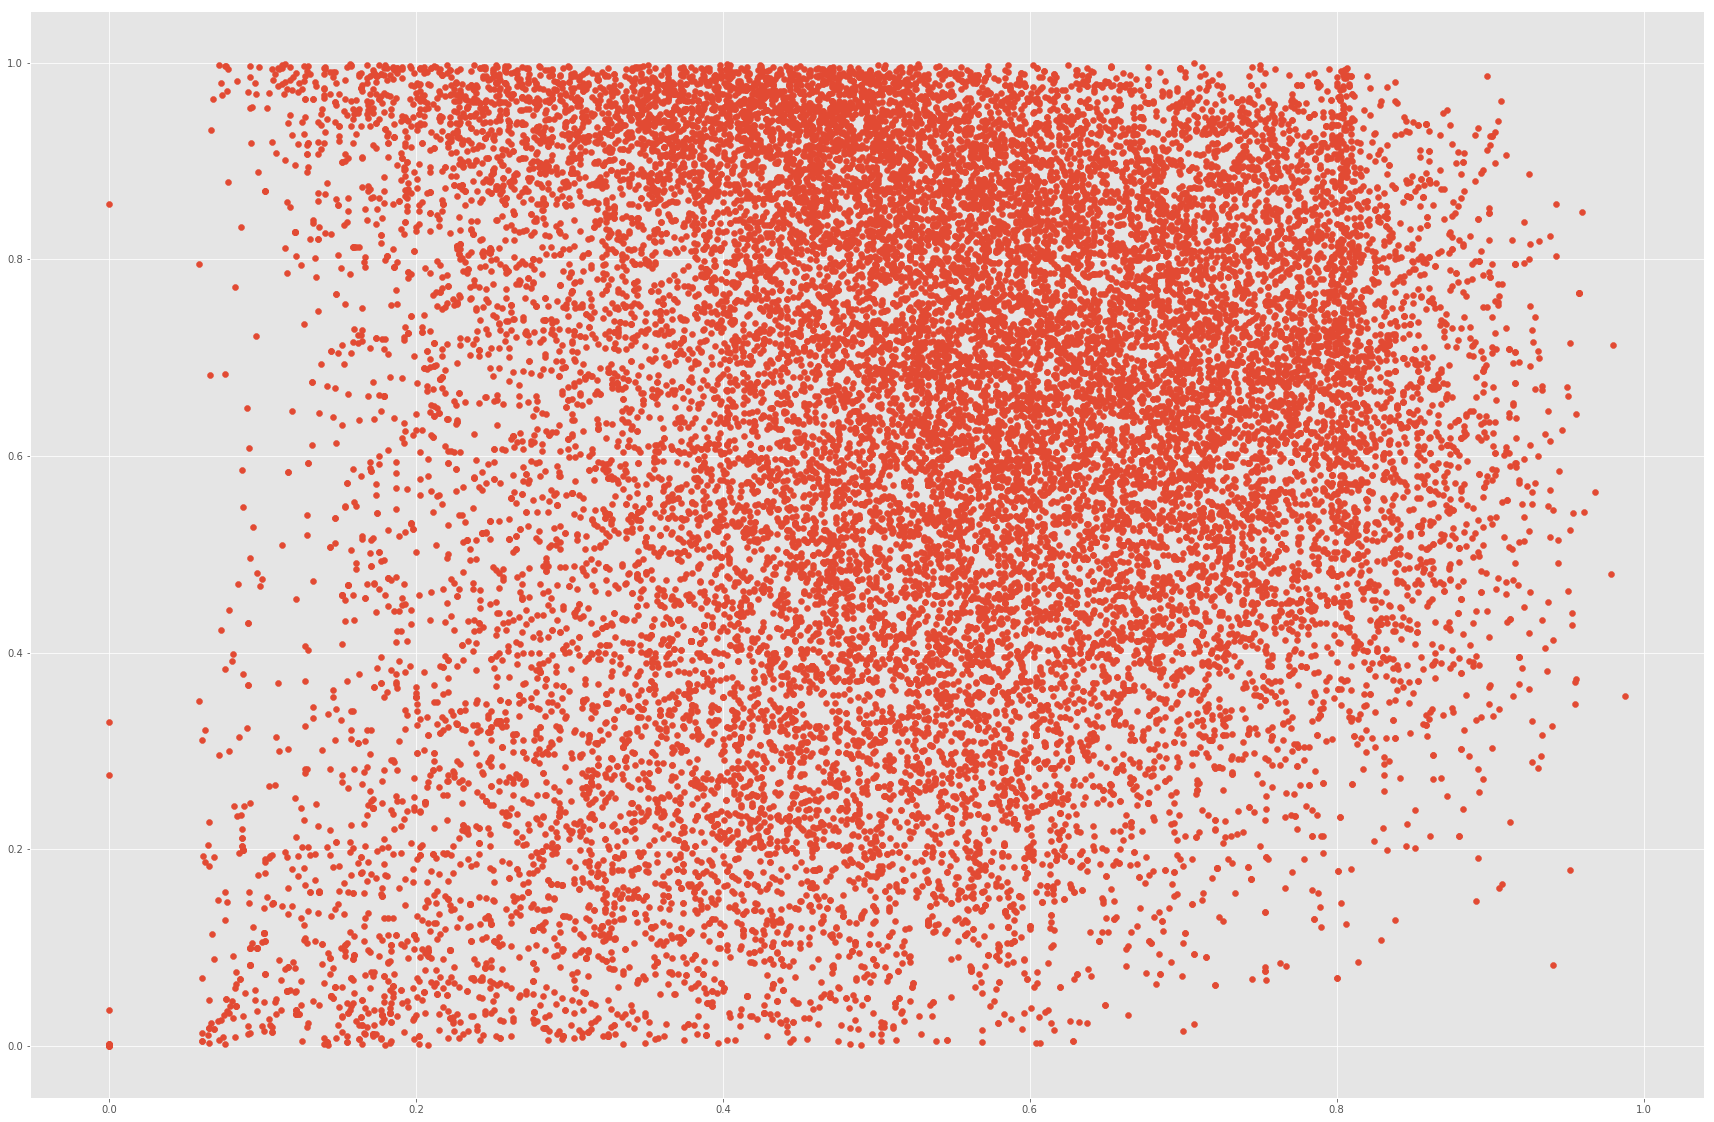

In [56]:
plot_a_scatter(db = events, x = 'danceability', y = 'energy')

## Genere - What to do with missing values

In [57]:
def lista_generos(db = events, lib = 'spotify', var = 'genres'):
    list_of_strings = []

    for i in range(len(db[lib])):
        if type(db[lib][i]) != float:
            list_of_strings.extend(db[lib][i][var])
            
    return(list_of_strings)    


In [58]:
list_of_generes = lista_generos(db = events, lib = 'spotify', var = 'genres')

In [59]:
events['spotify'][2]['genres']

['bow pop',
 'chamber pop',
 'compositional ambient',
 'focus',
 'icelandic classical',
 'icelandic pop',
 'neoclassical',
 'new tribe']

## Word cloud

In [60]:
len(list_of_generes)

4157

In [61]:
words = list_of_generes

### For some reason this code stop working.... something wrong with pillow module

In [62]:
def make_a_Wcloud(lista = list_of_generes, mask = "London_mask2.png", n_words=200):
    london_mask = np.array(Image.open(mask))
    stopwords = set(STOPWORDS)
    data = lista

    wordcloud = WordCloud(width=600, height=200,
                              background_color='black',
                              stopwords=stopwords,
                              max_words=n_words,
                              max_font_size=80,
                              mask=london_mask,
                              random_state=42
                             ).generate(str((data)))



    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

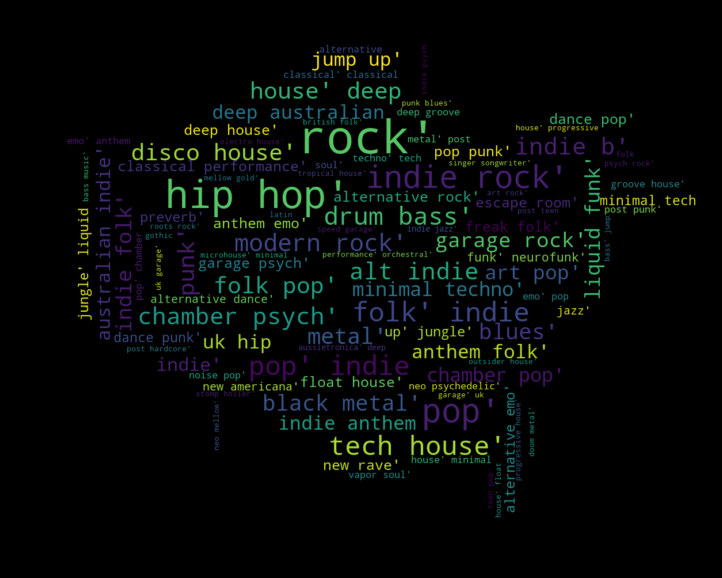

In [63]:
make_a_Wcloud(n_words = 100)

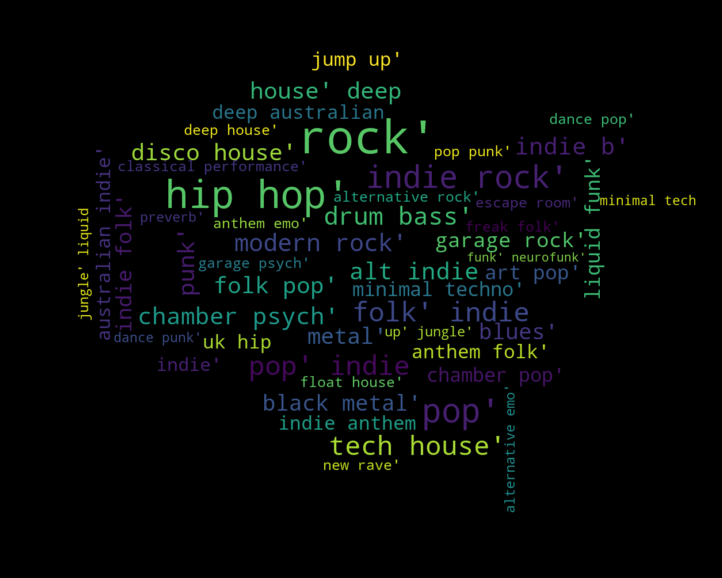

In [64]:
make_a_Wcloud(n_words = 50)

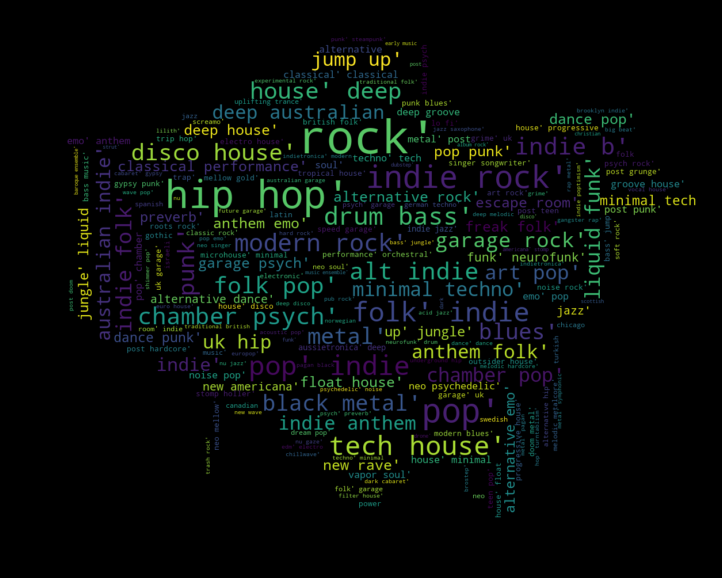

In [65]:
make_a_Wcloud(n_words = 200)

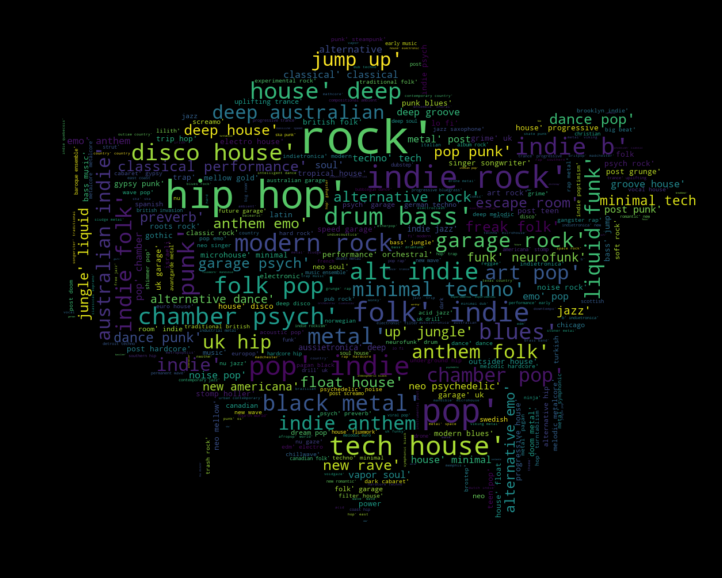

In [66]:
make_a_Wcloud(n_words = 350)

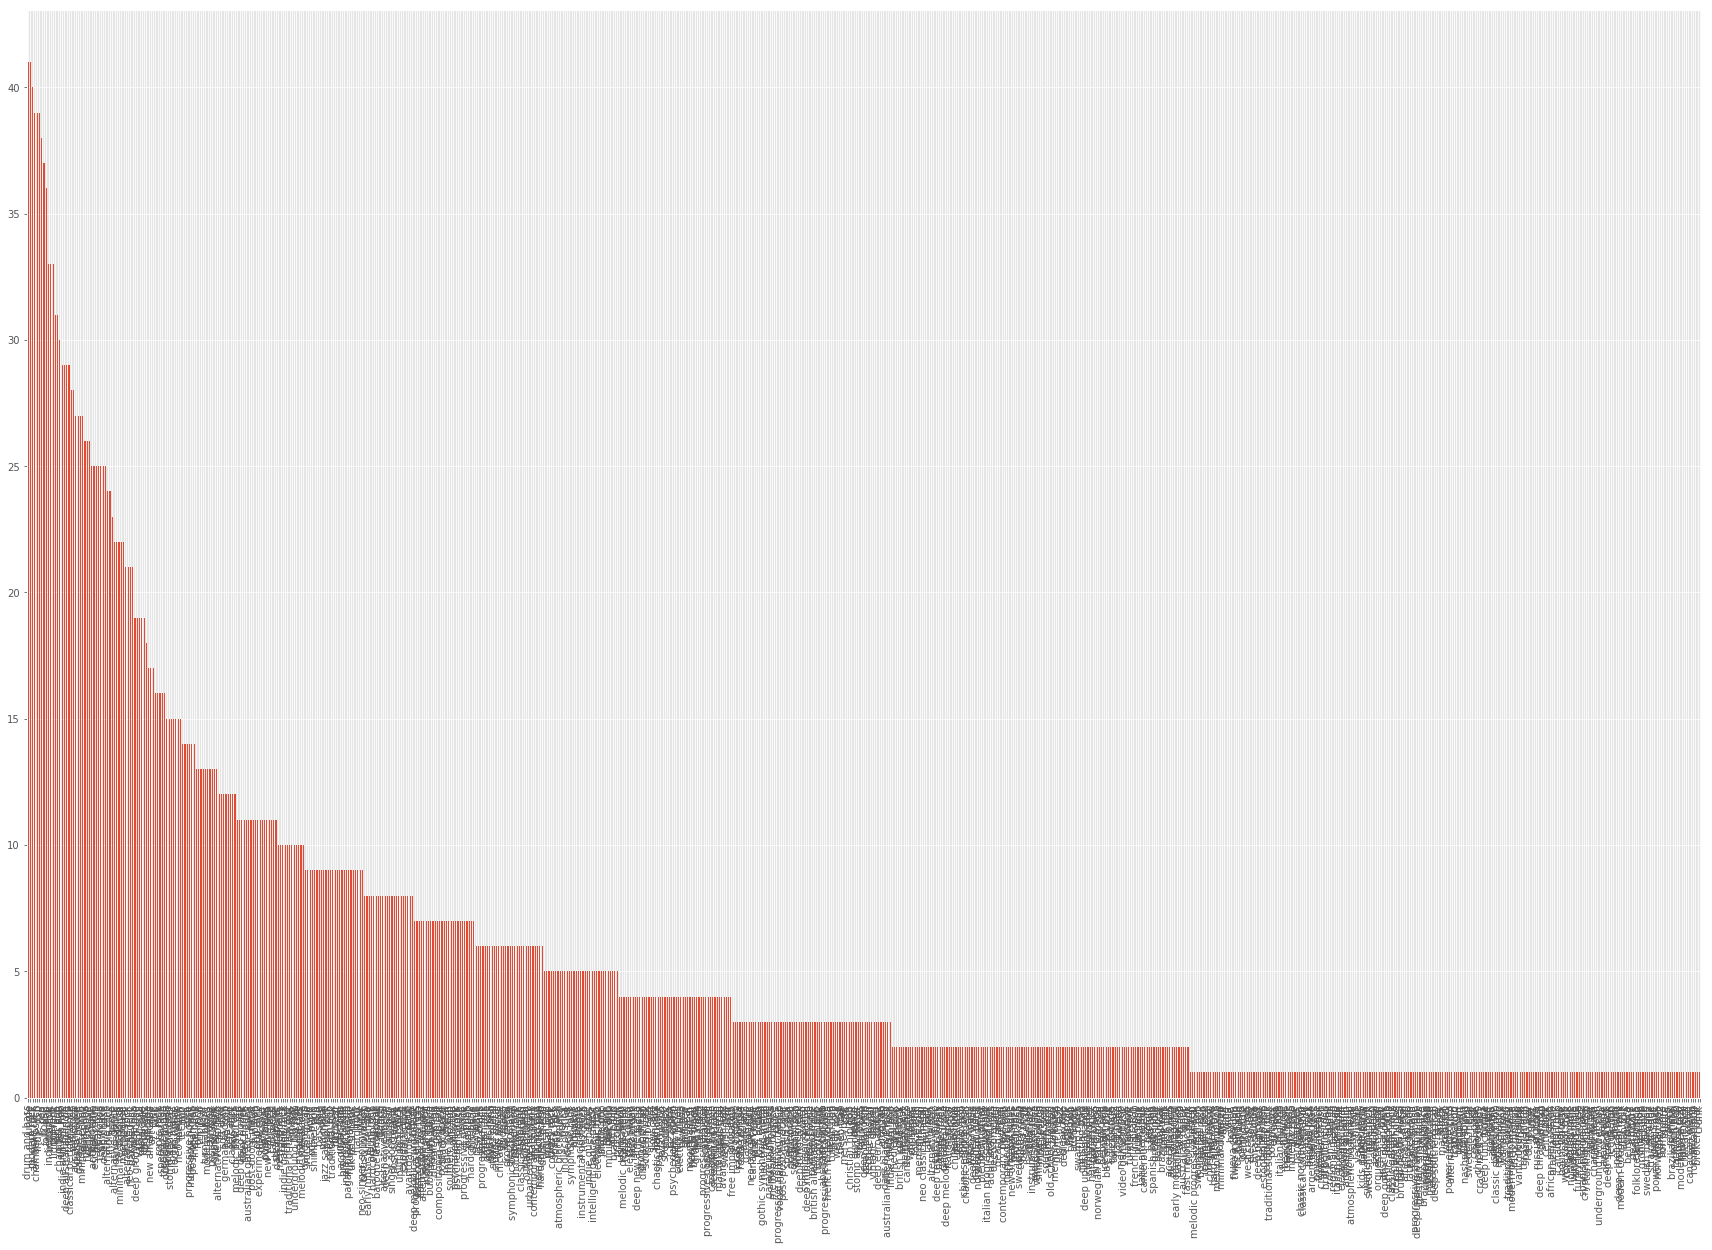

In [67]:
pd.Series(words).value_counts().plot('bar')

## Spotify vars

In [68]:
def plot_distributions(db = events, var = 'acousticness_median'):
    list_of_var = []

    for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_var.append(db['spotify'][i][var])
    
    
    plt.hist(list_of_var)

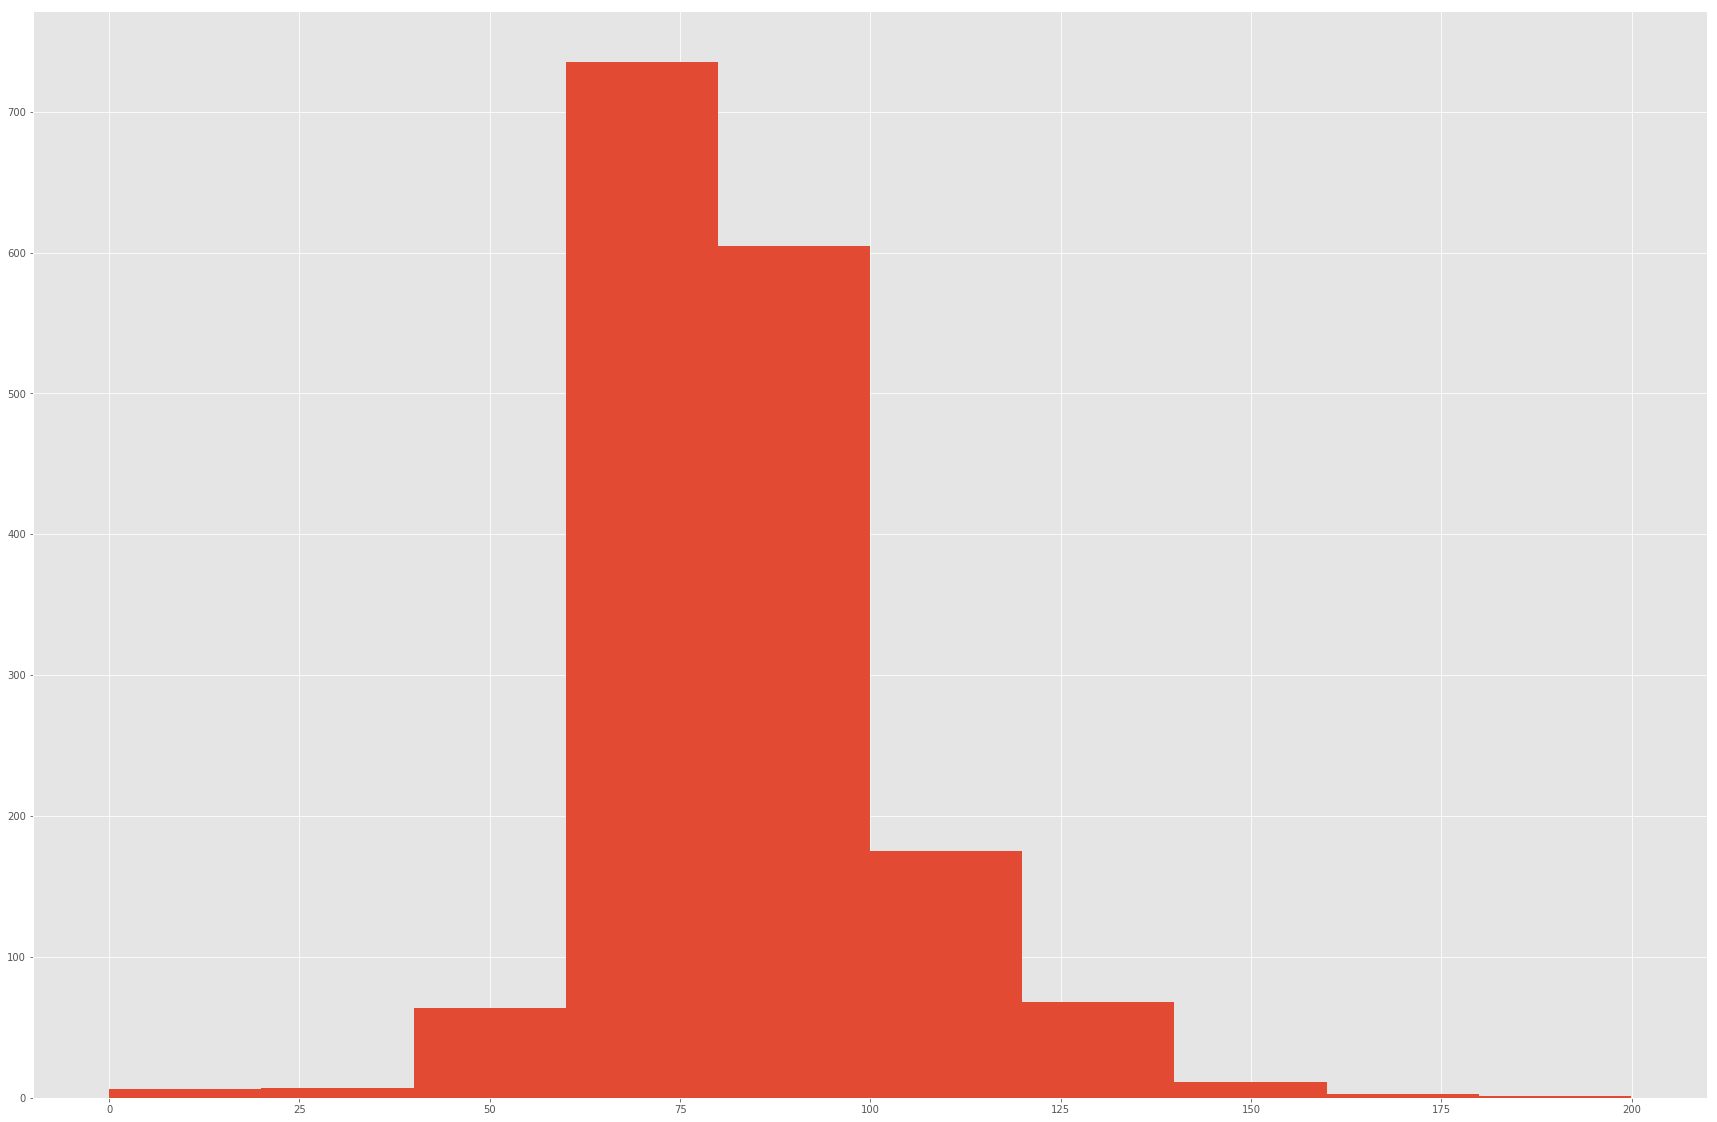

In [69]:
plot_distributions(events, var = 'tempo_min')

In [70]:
list_of_acousticness = []

for i in range(len(events['spotify'])):
    if type(events['spotify'][i]) != float:
        list_of_acousticness.append(events['spotify'][i]['acousticness_median'])
    

(array([715., 185., 149., 105.,  78.,  92.,  87.,  88.,  90.,  86.]),
 array([1.86000000e-06, 9.95016740e-02, 1.99001488e-01, 2.98501302e-01,
        3.98001116e-01, 4.97500930e-01, 5.97000744e-01, 6.96500558e-01,
        7.96000372e-01, 8.95500186e-01, 9.95000000e-01]),
 <a list of 10 Patch objects>)

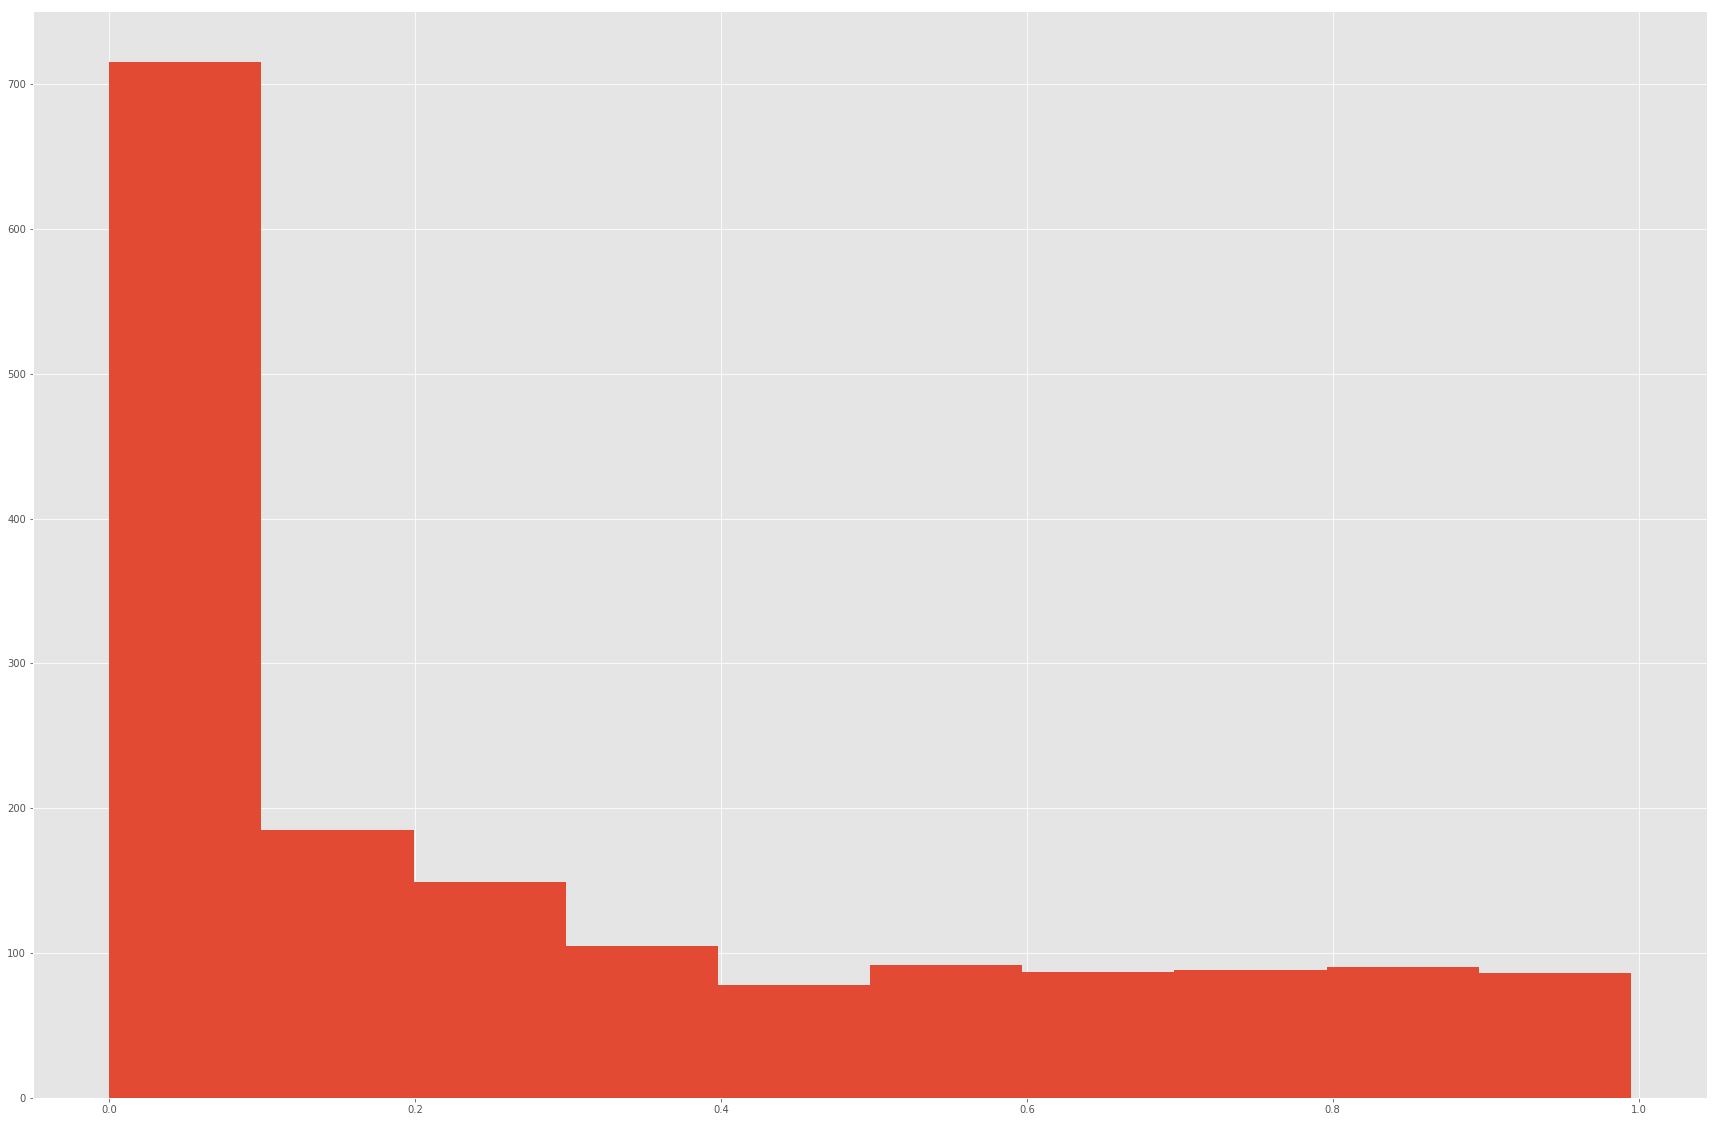

In [71]:
plt.hist(list_of_acousticness)

In [72]:
list_of_tempo = []
list_of_dance =[]

db = events

for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_tempo.append(db['spotify'][i]['energy_median'])
            
for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_dance.append(db['spotify'][i]['popularity_median'])            

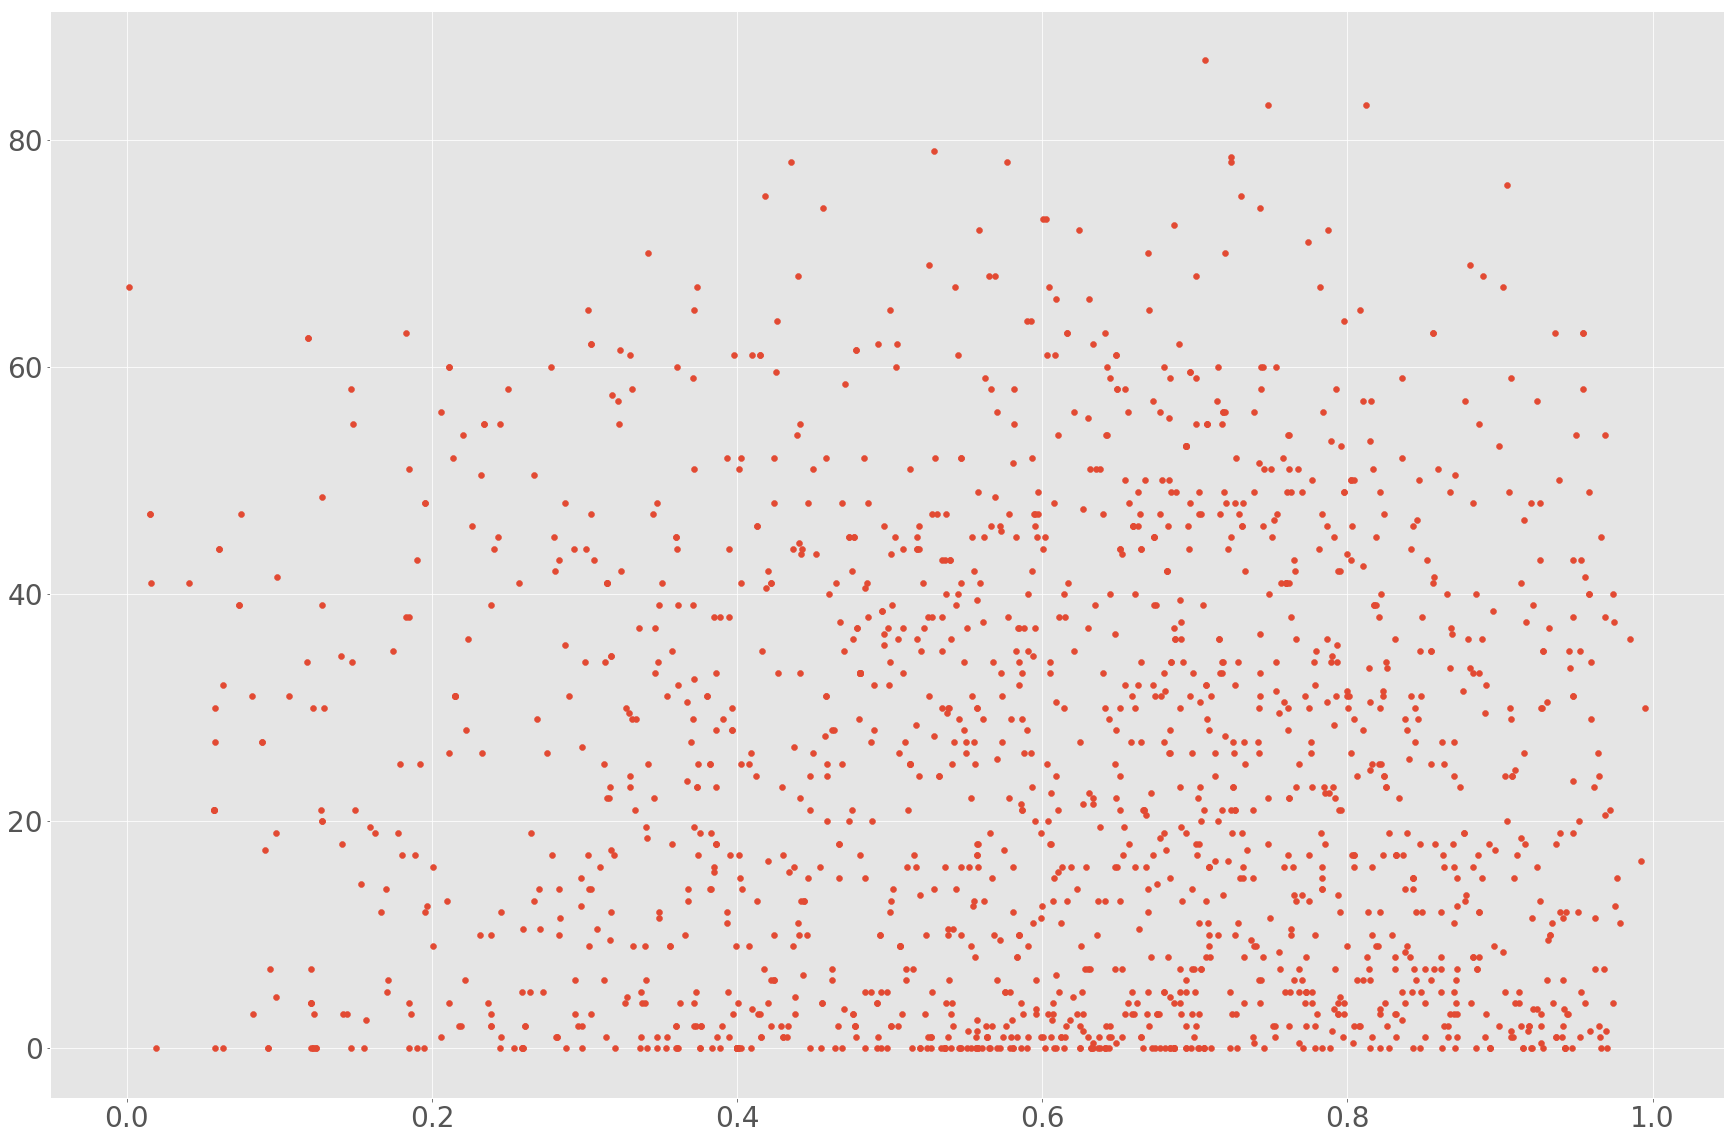

In [73]:
plt.scatter(list_of_tempo, list_of_dance)


plt.tick_params(labelsize=28)

## Last.fm

In [74]:
events['lastfm'][0]

{'listeners': [412072, 57, 192843],
 'listeners_sum': 604972,
 'playcount': [21290352, 958, 3674367],
 'playcount_sum': 24965677,
 'tags': ['seen live',
  'folk',
  'singer-songwriter',
  'acoustic',
  'british',
  'indie',
  'folk punk',
  'punk',
  'folk rock',
  'rock',
  'seen live',
  'indie',
  'acoustic',
  'singer-songwriter',
  'british',
  'alternative',
  'folktronica',
  'indie pop',
  'folk',
  'emo']}

In [75]:
last_fm_list = ['listeners_sum',
               'playcount_sum']

In [76]:
for i in last_fm_list:
    # print(i)
    make_vars(db = events, dictionary = 'lastfm', var = i)

(0, 5000000)

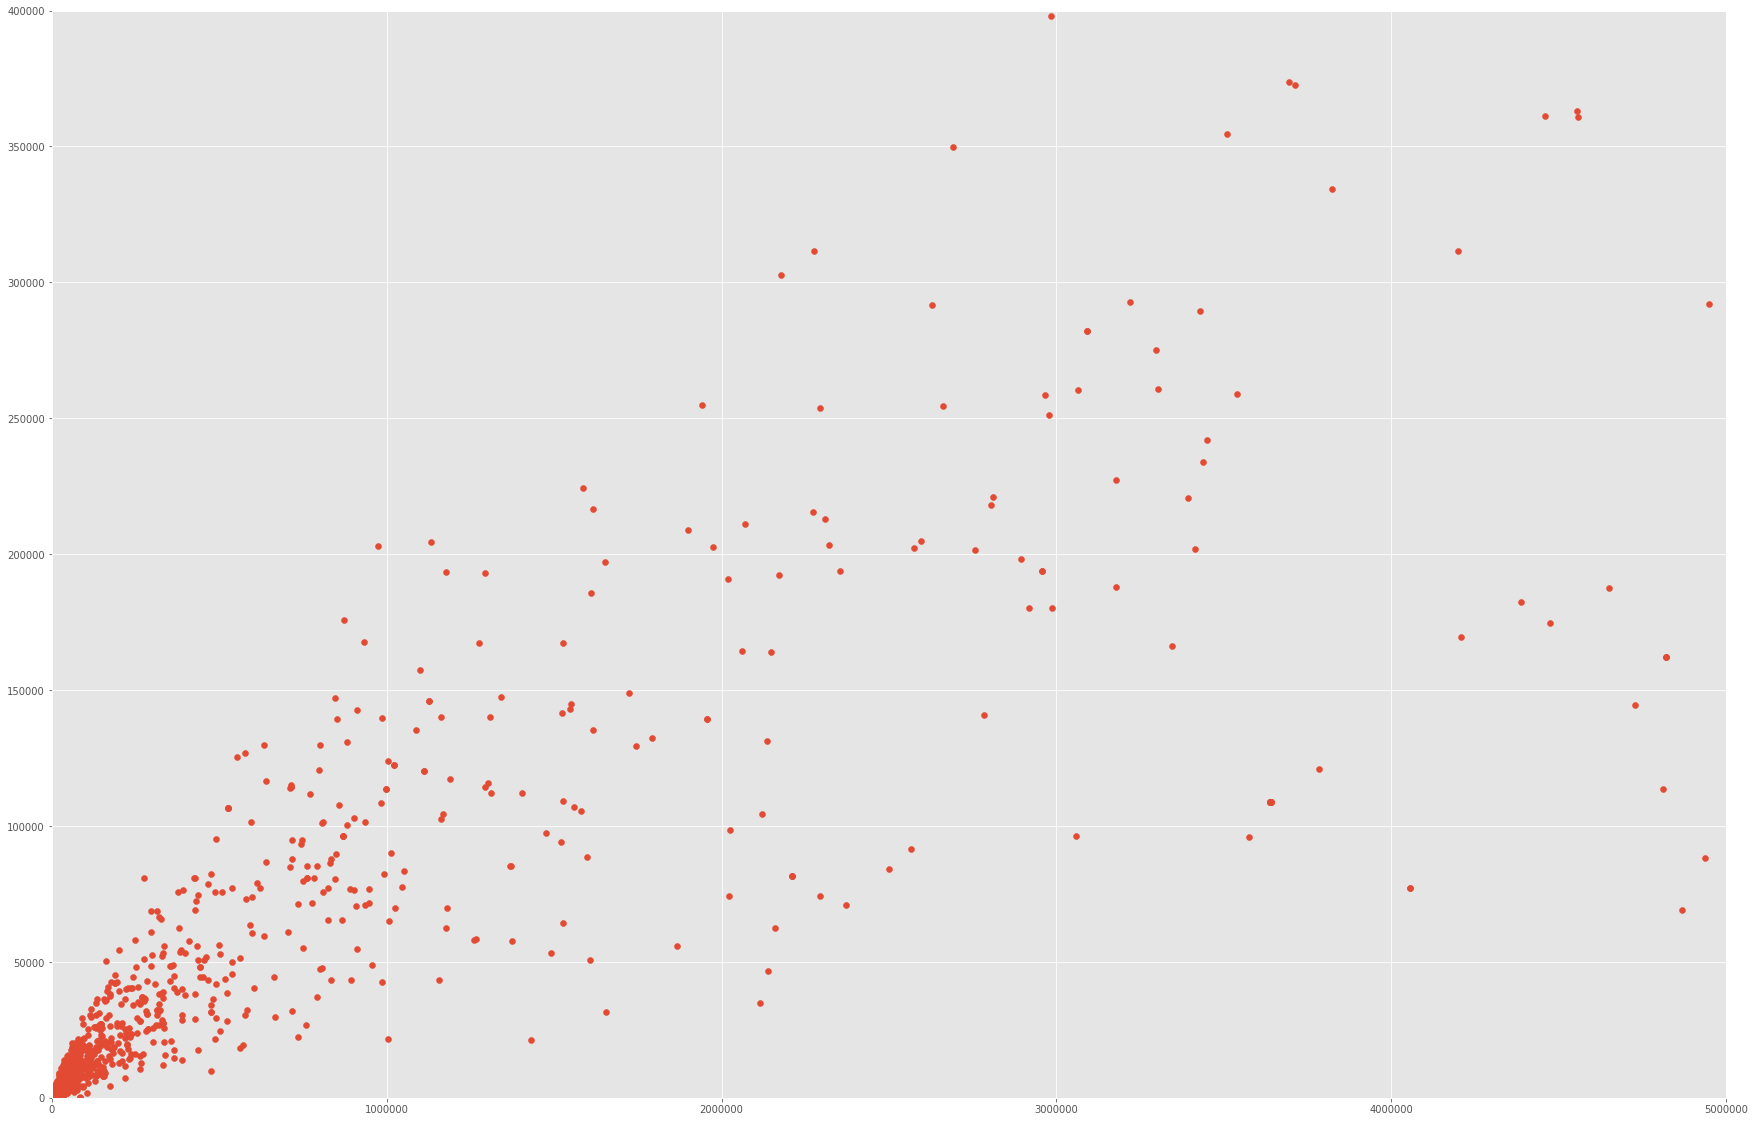

In [77]:
plt.scatter(db['playcount_sum'], db['listeners_sum'])
plt.ylim(0,400000)
plt.xlim(0,5000000)

(0, 750000)

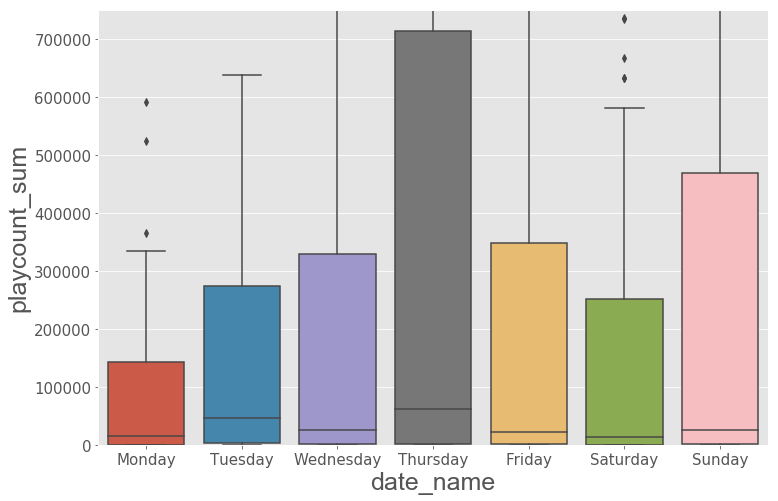

In [78]:
make_boxes(var_y = 'playcount_sum')
plt.ylim(0,750000)

(0, 100000)

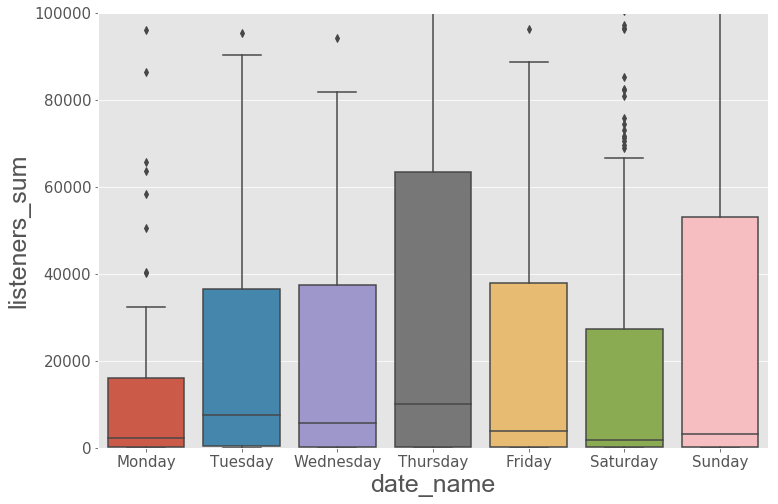

In [79]:
make_boxes(var_y = 'listeners_sum')
plt.ylim(0,100000)

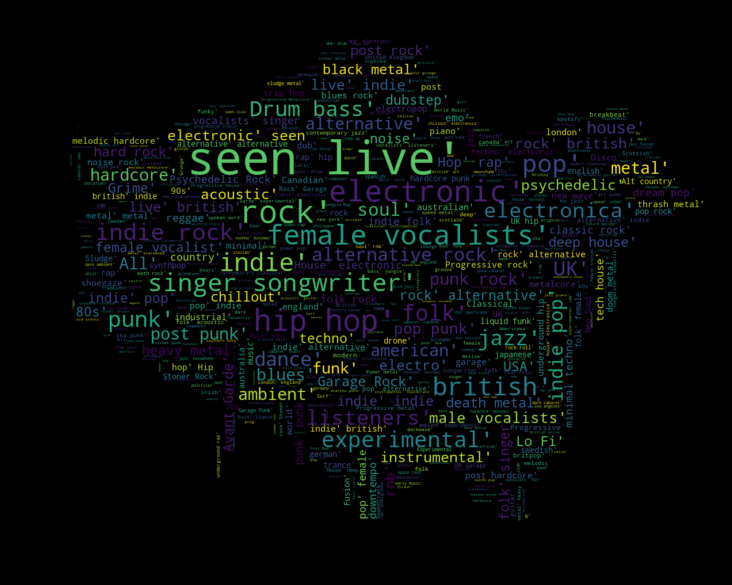

In [80]:
list_of_last_fm_gener = lista_generos(db = events, lib = 'lastfm', var = 'tags')

make_a_Wcloud(lista = list_of_last_fm_gener, mask = "London_mask2.png", n_words = 500)

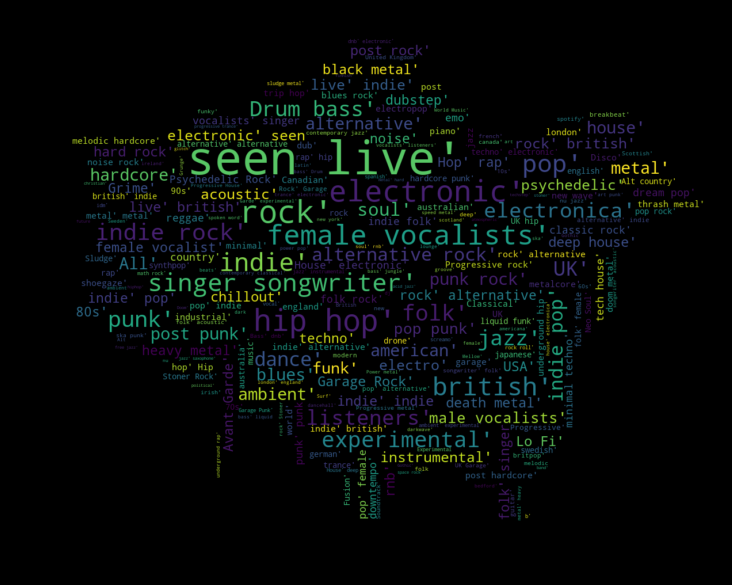

In [81]:
make_a_Wcloud(lista = list_of_last_fm_gener, mask = "London_mask2.png", n_words = 250)

In [82]:
for keys in events['foursquare'][23]:
    print(keys)

id
name
fq_url
location
price
description
likes
likes_summary
photo
contact
rating
rating_color
tips


In [83]:
events['foursquare'][23]


{'contact': {'facebook': '203878729633687',
  'facebook_name': 'Boisdale Restaurants',
  'facebook_username': 'BoisdaleRestaurants',
  'phone': '+442077155818',
  'twitter': 'boisdalecw',
  'url': 'http://www.boisdale.co.uk'},
 'description': 'A lively restaurant serving traditional Scottish cuisine, with live music, whisky bar, cigar terrace, caviar and oyster bar and cigar library, overlooking the Thames and city skyline.',
 'fq_url': 'http://4sq.com/g14NxC',
 'id': '4da4b31e2538d7ce7bad465c',
 'likes': 122,
 'likes_summary': '122 Likes',
 'location': {'address': 'Cabot Place',
  'city': 'Canary Wharf',
  'zip': 'E14 4QT'},
 'name': 'Boisdale of Canary Wharf',
 'photo': {'prefix': 'https://igx.4sqi.net/img/general/',
  'suffix': '/1420470_G42gIu4Ik0ogLk0THJzmX2GutiGjd6n_LIOk4bhkyaw.jpg'},
 'price': {'currency': '£', 'message': 'Expensive', 'tier': 3},
 'rating': 7.9,
 'rating_color': 'C5DE35',
 'tips': [{'text': 'No mention was made when I booked for dinner that an extra £15 per head

In [84]:
lista_nueva = []
# Make this for the desired variable
for i in range(len(events['foursquare'])):

    # If there is nothing in the spotify dictionary, make Nan value
    if type(events['foursquare'][i]) == float:
        lista_nueva.append(np.nan)

    else:
        try:
            #print(db['foursquare'][i]['price']['tier'])
            lista_nueva.append(events['foursquare'][i]['price']['tier'])

        except:
            lista_nueva.append(np.nan)


# Integrate all the stuff
events['tier_price'] =   lista_nueva

In [85]:
def make_vars_1(db = events, dictionary = 'spotify', var = 'popularity_median'):
    lista_nueva = []
    # Make this for the desired variable
    for i in range(len(db[dictionary])):
        
        # If there is nothing in the spotify dictionary, make Nan value
        if type(db[dictionary][i]) == float:
            lista_nueva.append(np.nan)

        else:
            try:
                #print(db[dictionary][i][var])
                lista_nueva.append(db[dictionary][i][var])
                
            except:
                lista_nueva.append(np.nan)
                
            
    # Integrate all the stuff
    db[var] =   lista_nueva      


In [86]:
list_of_4sqrs_vars = ['likes', 'rating']

In [87]:
for i in list_of_4sqrs_vars:
    # print(i)
    make_vars_1(db = events, dictionary = 'foursquare', var = i)

In [88]:
for i in list_of_bars:
    # print(i)
    make_vars(db = events, dictionary = 'spotify', var = i)

In [89]:
len(events)

1913

In [90]:
len(events['foursquare'])

1913

In [91]:
events['foursquare'][0]['description']

'Legendary venue dedicated to nurturing creative young talent and presenting an eclectic line up of  Live Music, Theatre, Circus and New Media.'

In [92]:
def lista_generos_2(db = events, lib = 'spotify', var = 'genres'):
    list_of_strings = []

    for i in range(len(db[lib])):
        #print(i)
        try:
            list_of_strings.append(db[lib][i][var])
            
        except: 
            pass
            
    return(list_of_strings)    


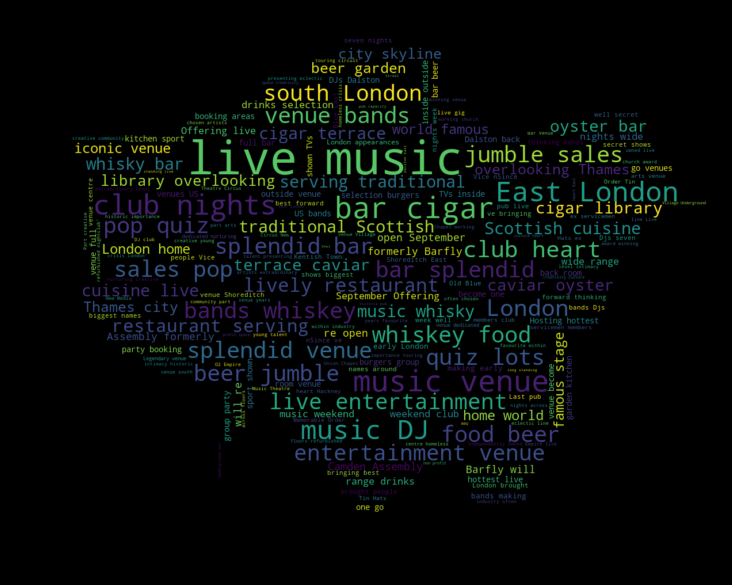

In [93]:
list_of_4sq_descr = lista_generos_2(db = events, lib = 'foursquare', var = 'description')

make_a_Wcloud(lista = list_of_4sq_descr, mask = "London_mask2.png", n_words = 200)

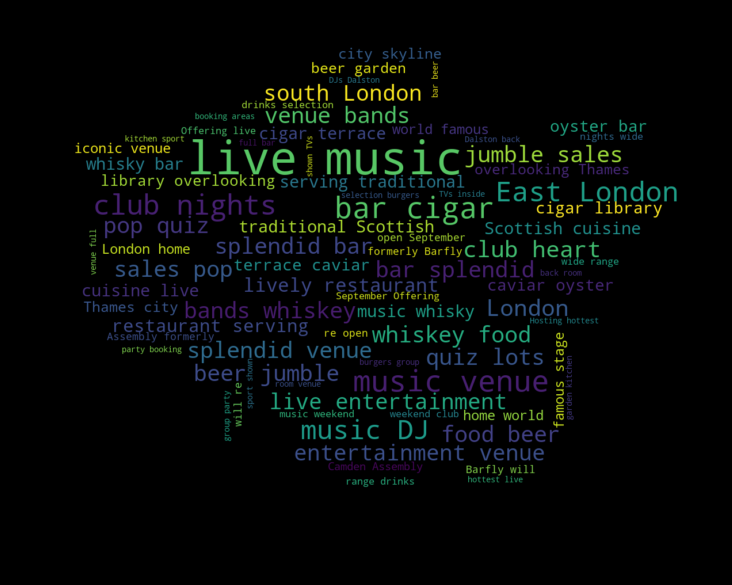

In [94]:
make_a_Wcloud(lista = list_of_4sq_descr, mask = "London_mask2.png", n_words = 80)

(0, 4)

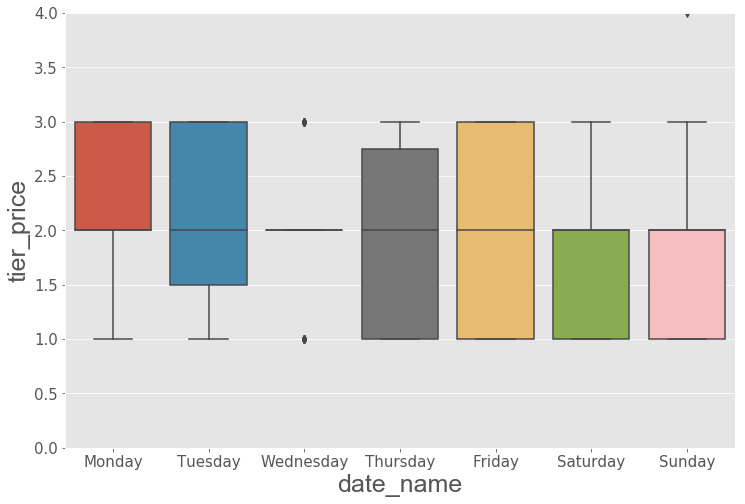

In [95]:
make_boxes(var_y = 'tier_price')
plt.ylim(0,4)

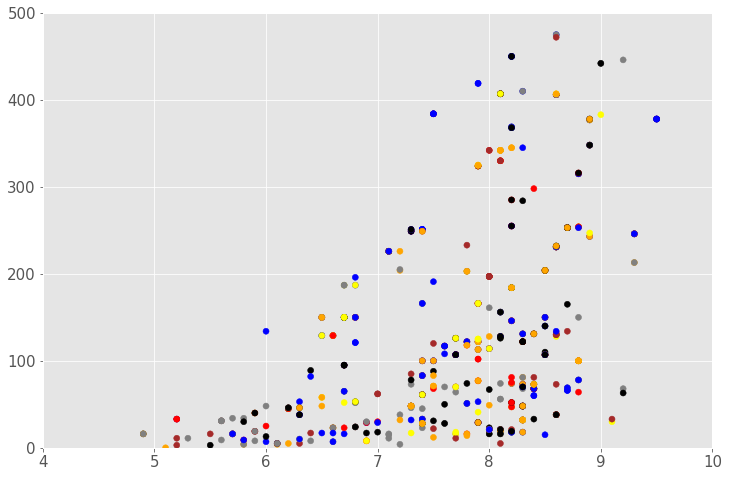

In [96]:
colors = {'Monday':'yellow', 
          'Tuesday':'orange', 
          'Wednesday':'red', 
          'Thursday':'brown', 
          'Friday': 'grey' ,
          'Saturday': 'blue' , 
          'Sunday' : 'black' }

fig, ax = plt.subplots()
ax.scatter(db['rating'], db['likes'], c=db['date_name'].apply(lambda x: colors[x]))

plt.ylim(0,500)
plt.xlim(4,10)
plt.show()

(4, 10)

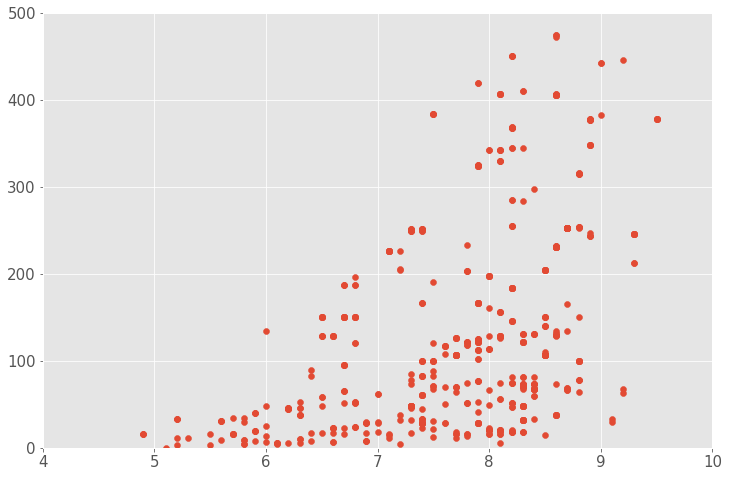

In [97]:
plt.scatter(db['rating'], db['likes'])
plt.ylim(0,500)
plt.xlim(4,10)

## City Level

In [99]:
# Get rid of the Nan
df_no_nulls = events[events['lat'].notnull()]
df_no_nulls = df_no_nulls.reset_index()

In [100]:
df_no_nulls['name']

0       Frank Turner with Seán McGowan and Get Cape. W...
1       Andy May Trio at The Slaughtered Lamb (May 14,...
2       Ólafur Arnalds with Manu Delago at Royal Alber...
3       Elephant Sessions at Thousand Island (formerly...
4       Gary Lucas and Ed Laurie at Bush Hall (May 14,...
5                   Nils Lofgren at G Live (May 14, 2018)
6       Ladysmith Black Mambazo at Bridge Theatre (May...
7       Gemma Khawaja at Folk in the Cellar: The Const...
8       The English Concert and Kristian Bezuidenhout ...
9        Birds of Chicago at The Lexington (May 14, 2018)
10      Clive Gregson & Liz Simcock at Ruskin House (M...
11      Tyne James Organ at The Waiting Room (May 14, ...
12      Days Are Done at Half Moon, Putney (May 14, 2018)
13                                     Lost Evenings 2018
14      Now, Now with So Below and JOAN at The Dome, T...
15       Mesadorm at St Pancras Old Church (May 14, 2018)
16      David Sinclair Four with Maaike Siegerist at T...
17            

In [101]:
locations = df_no_nulls[['lat', 'lng']]
locationlist = locations.values.tolist()

In [102]:
locationlist[1]

[51.5233496, -0.1011681]

In [103]:
map = folium.Map(location = [51.5, -0.1],
                 tiles= 'stamenwatercolor',
                 zoom_start=10)

for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], radius=3, 
                        fill = True,
                        fill_color='black',
                        line_color='black',
                        color = 'black',
                        fill_opacity=0.7).add_to(map)
    
HeatMap(locationlist).add_to(map)

In [104]:
map

In [105]:
map.save('heatmap of gigs.html') #save HTML